In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('economic_index.csv')
df.head(5)

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [191]:
df.drop(['Unnamed: 0','year','month'],axis=1,inplace=True)

In [192]:
df.head(5)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [193]:
df['interest_rate'].isnull().sum()

np.int64(0)

In [194]:
df['unemployment_rate'].isnull().sum()

np.int64(0)

In [195]:
df['index_price'].isnull().sum()

np.int64(0)

In [196]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


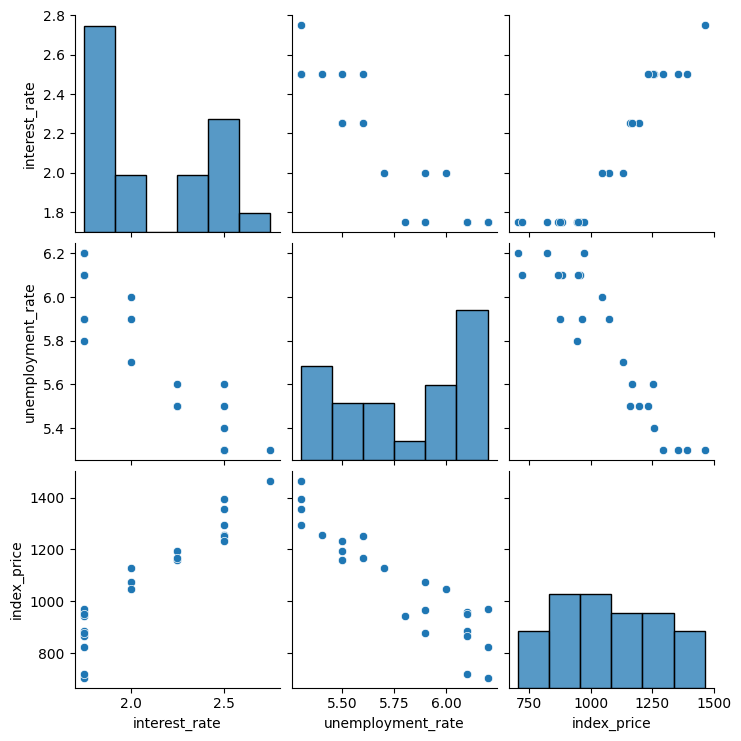

In [197]:
sns.pairplot(df)

In [198]:
#independent and dependent feature
X=df[['interest_rate','unemployment_rate']]
y=df['index_price']
np.array(y)


array([1464, 1394, 1357, 1293, 1256, 1254, 1234, 1195, 1159, 1167, 1130,
       1075, 1047,  965,  943,  958,  971,  949,  884,  866,  876,  822,
        704,  719])

In [199]:
X.shape

(24, 2)

In [200]:
y.shape

(24,)

In [201]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [202]:
df.head(5)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


## plot regplot for features 

<Axes: xlabel='interest_rate', ylabel='index_price'>

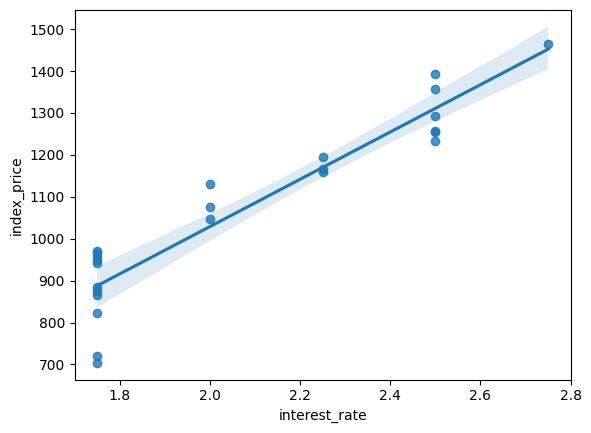

In [232]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

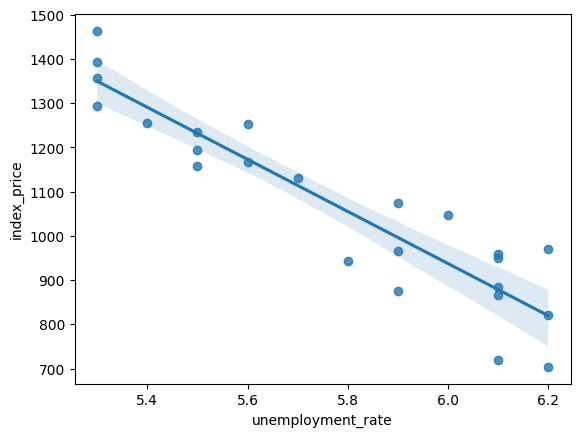

In [233]:
sns.regplot(x=df['unemployment_rate'],y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

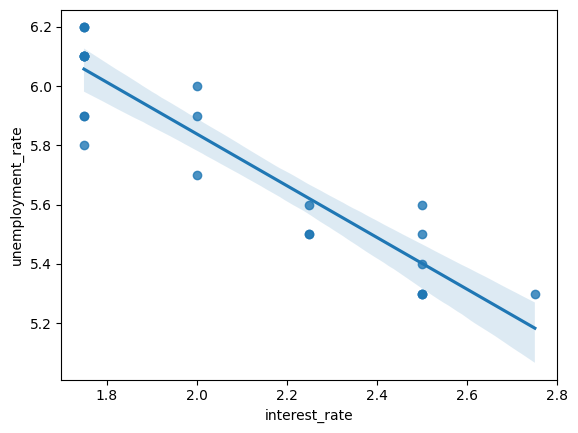

In [234]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

# STANDARD SCALAR

In [203]:
from sklearn.preprocessing import StandardScaler

In [204]:
scalar=StandardScaler()

In [205]:
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [206]:
X_train.shape

(18, 2)

In [207]:
X_test.shape

(6, 2)

In [208]:
Y_train.shape

(18,)

In [209]:
Y_test.shape

(6,)

In [210]:
from sklearn.linear_model import LinearRegression 

In [211]:
regression=LinearRegression()

In [212]:
model=regression.fit(X_train,Y_train)

In [213]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [214]:
from sklearn.model_selection import cross_val_score

In [215]:
cross_validation_score=cross_val_score(model,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [216]:
np.mean(cross_validation_score)

np.float64(-5914.828180162386)

# PREDICTION

In [217]:
Y_pred=model.predict(X_test)

In [218]:
##performnce metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [219]:
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [220]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,Y_pred)
print(score)

0.8278978091457145


In [221]:
##display adjusted r2
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7131630152428576

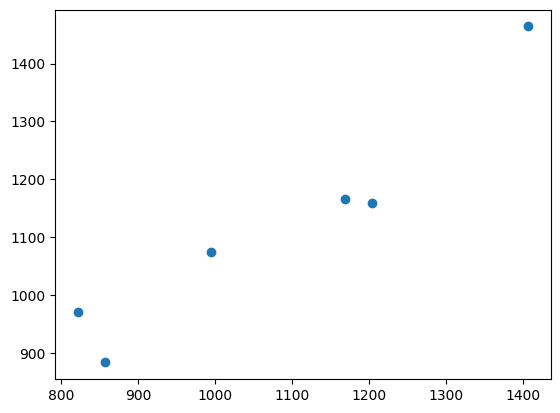

In [222]:
plt.scatter(Y_pred,Y_test)

In [223]:
##residual
residual=Y_test-Y_pred
print(residual)


8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


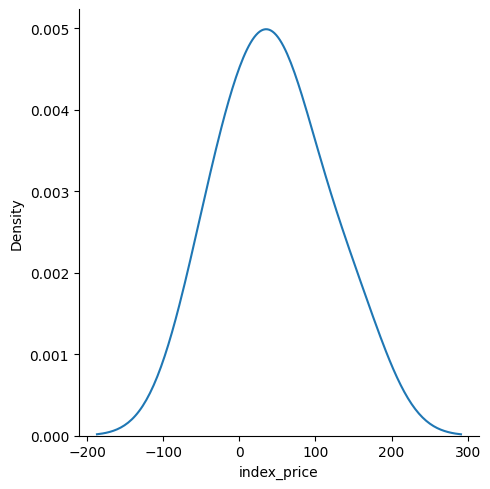

In [224]:
sns.displot(residual,kind='kde')

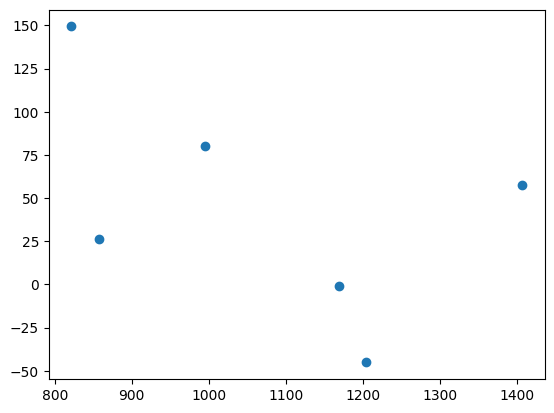

In [225]:
plt.scatter(Y_pred,residual)

In [226]:
import statsmodels.api as sm
model=sm.OLS(Y_train,X_train).fit()

In [227]:
prediction=model.predict(X_test)

In [228]:
print(prediction)

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [229]:
##printing coeff and intercept
slope=regression.coef_
intercept=regression.intercept_
print('slope of the train data is ',slope)
print('intercept of the train data is ',intercept)

slope of the train data is  [  88.27275507 -116.25716066]
intercept of the train data is  1053.4444444444443


In [230]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 23 Aug 2025   Prob (F-statistic):                       0.754
Time:                        22:01:16   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""